1️⃣ Install and Import Packages

In [12]:
# If you don't have these, install via pip:
# %pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


📘 2. Load the Data

In [13]:
# Make sure the 'heart.csv' file is in your working directory
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


📘 3. Explore the Data

In [15]:
df.info()
df.describe()
df["condition"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


condition
0    160
1    137
Name: count, dtype: int64

📘 4. Preprocessing

In [17]:
X = df.drop("condition", axis=1)
y = df["condition"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


📘 5. Train-Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


📘 6. Train Multiple Models

In [19]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


📘 7. Evaluate Models

In [20]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.916667,1.000000,0.821429,0.901961
Random Forest,0.850000,0.952381,0.714286,0.816327
SVM,0.900000,1.000000,0.785714,0.880000
KNN,0.900000,1.000000,0.785714,0.880000


📘 8. Visualize Model Performance

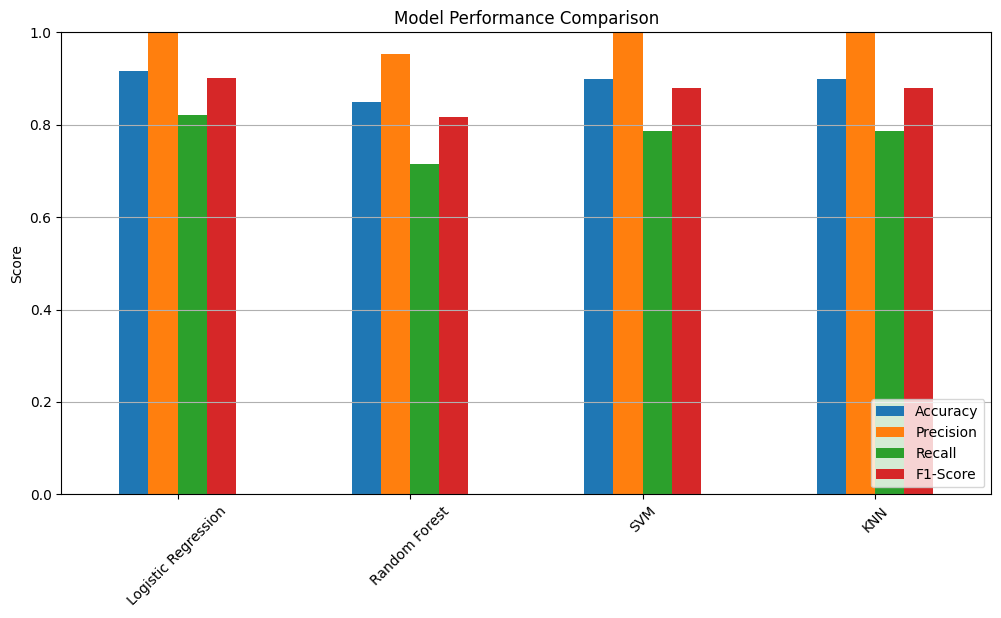

In [21]:
results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y")
plt.show()


📘 9. Hyperparameter Tuning: Random Forest (GridSearchCV)

In [22]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best F1 Score (CV):", grid_search_rf.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score (CV): 0.7951639140133633


📘 10. Hyperparameter Tuning: SVM (RandomizedSearchCV)

In [23]:
from scipy.stats import uniform

param_dist_svm = {
    'C': uniform(0.1, 10),
    'gamma': uniform(0.01, 0.1),
    'kernel': ['rbf', 'linear']
}

random_search_svm = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist_svm,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_search_svm.fit(X_train, y_train)

print("Best Parameters:", random_search_svm.best_params_)
print("Best F1 Score (CV):", random_search_svm.best_score_)


Best Parameters: {'C': np.float64(0.17066305219717406), 'gamma': np.float64(0.012306242504141576), 'kernel': 'rbf'}
Best F1 Score (CV): 0.7954867939078466


In [ ]:
📘 11. Evaluate Tuned Model on Test Set
Example: Tuned Random Forest

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.95      0.71      0.82        28

    accuracy                           0.85        60
   macro avg       0.87      0.84      0.84        60
weighted avg       0.87      0.85      0.85        60



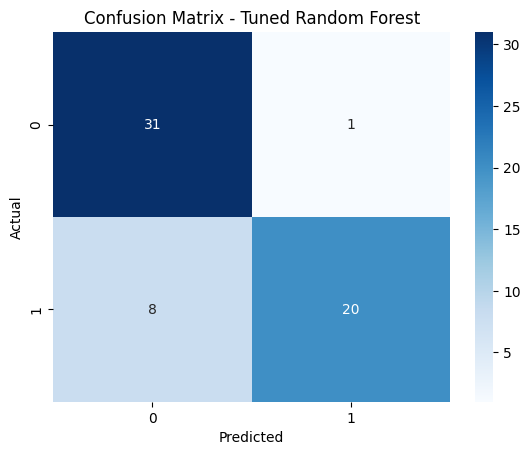

In [24]:
best_rf = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
